In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 定义导入,导出路径

folder_path = r"E:\Test\Inputs"

In [3]:
# 数据导入 WWTPs

file_WWTP = os.path.join(folder_path, "WWTP_corrected.xlsx")
df_WWTP = pd.read_excel(file_WWTP)

In [5]:
value = df_WWTP['月处理水量（万m³）'].sum()
value = value/100
value

67842.5483

In [7]:
rate1 = round(8225/value*100,2)
rate2 = round(9773/value*100,2)
rate3 = round(10224/value*100,2)
rate4 = round(10477/value*100,2)
print(rate1,rate2,rate3,rate4)

12.12 14.41 15.07 15.44


In [4]:
# 数据导入 CFPPs

file_CFPP =  os.path.join(folder_path, "CFPP_WITHOUT_OT.xlsx")
df_CFPP = pd.read_excel(file_CFPP)

file_CFPP_annual = os.path.join(folder_path, "coal-fired_power_plants_China_without_ot_2020_operating.xlsx")
df_CFPP_annual = pd.read_excel(file_CFPP_annual)

In [5]:
# 数据导入 WIPPs

file_WIPP =  os.path.join(folder_path, "WIPP.xlsx")
df_WIPP = pd.read_excel(file_WIPP)

file_WIPP_annual = os.path.join(folder_path, "waste_inceration_plants_2020_operating.xlsx")
df_WIPP_annual = pd.read_excel(file_WIPP_annual)

In [6]:
# 数据导入 GFPPs

file_GFPP =  os.path.join(folder_path, "GFPP.xlsx")
df_GFPP = pd.read_excel(file_GFPP)

file_GFPP_annual = os.path.join(folder_path, "gas-fired_power_plants_China_2020_operating.xlsx")
df_GFPP_annual = pd.read_excel(file_GFPP_annual)

In [7]:
# 计算污水厂月再生水量，月煤电厂可利用再生水上限、月垃圾焚烧厂可利用再生水上限上限 
# 单位：million m3


df_ReWater_Mon = df_WWTP.groupby(['Province', 'Statistical month'])['月处理水量（万m³）'].sum().div(100).reset_index()
df_ReWater_Mon.rename(columns={'月处理水量（万m³）':'Reclaimed_water_supply'},inplace=True)

df_Coal_Mon = df_CFPP.groupby(['Province', 'Statistical month'])[['Monthly_Water_Ele_m3','Monthly_Water_Heat_m3']].sum().div(1000000).reset_index()
df_Coal_Mon.rename(columns={
    'Monthly_Water_Ele_m3': 'Monthly_Water_Coal_Ele',
    'Monthly_Water_Heat_m3': 'Monthly_Water_Coal_Heat'
}, inplace=True)

df_Coal_Mon['Coal_Total'] = df_Coal_Mon['Monthly_Water_Coal_Ele'] + df_Coal_Mon['Monthly_Water_Coal_Heat']



df_WIPP_Mon = df_WIPP.groupby(['Province', 'Statistical month'])[['Monthly_Water_Ele_m3','Monthly_Water_Heat_m3']].sum().div(1000000).reset_index()
df_WIPP_Mon.rename(columns={
    'Monthly_Water_Ele_m3': 'Monthly_Water_Waste_Ele',
    'Monthly_Water_Heat_m3': 'Monthly_Water_Waste_Heat'
}, inplace=True)

df_WIPP_Mon['Waste_Total'] = df_WIPP_Mon['Monthly_Water_Waste_Ele'] + df_WIPP_Mon['Monthly_Water_Waste_Heat']



df_GFPP_Mon = df_GFPP.groupby(['Province', 'Statistical month'])[['Monthly_Water_Ele_m3','Monthly_Water_Heat_m3']].sum().div(1000000).reset_index()
df_GFPP_Mon.rename(columns={
    'Monthly_Water_Ele_m3': 'Monthly_Water_Gas_Ele',
    'Monthly_Water_Heat_m3': 'Monthly_Water_Gas_Heat'
}, inplace=True)

df_GFPP_Mon['Gas_Total'] = df_GFPP_Mon['Monthly_Water_Gas_Ele'] + df_GFPP_Mon['Monthly_Water_Gas_Heat']



df_ReWater_Mon = pd.merge(df_ReWater_Mon,df_Coal_Mon,on=['Province', 'Statistical month'],how='outer')
df_ReWater_Mon = pd.merge(df_ReWater_Mon,df_WIPP_Mon,on=['Province', 'Statistical month'],how='outer')
df_ReWater_Mon = pd.merge(df_ReWater_Mon,df_GFPP_Mon,on=['Province', 'Statistical month'],how='outer')
df_ReWater_Mon.fillna(0, inplace=True)

df_ReWater_Mon['Ele_all'] = df_ReWater_Mon['Monthly_Water_Coal_Ele'] + df_ReWater_Mon['Monthly_Water_Waste_Ele'] + df_ReWater_Mon['Monthly_Water_Gas_Ele']
df_ReWater_Mon['Heat_all'] = df_ReWater_Mon['Monthly_Water_Coal_Heat'] + df_ReWater_Mon['Monthly_Water_Waste_Heat'] + df_ReWater_Mon['Monthly_Water_Gas_Heat']
df_ReWater_Mon['ALL'] = df_ReWater_Mon['Ele_all'] + df_ReWater_Mon['Heat_all']

# montly_total = df_ReWater_Mon.groupby('Statistical month')['ALL'].sum()
# montly_total.to_csv(r"E:/Test/Outputs/FWC_03_Heat_S2/ALL by month.csv",index=False)
df_ReWater_Mon.to_excel(r'E:/Test/Outputs/FWC_03_S1/Water_Mon.xlsx',index=False)
df_ReWater_Mon

,Province,Statistical month,Reclaimed_water_supply,Monthly_Water_Coal_Ele,Monthly_Water_Coal_Heat,Coal_Total,Monthly_Water_Waste_Ele,Monthly_Water_Waste_Heat,Waste_Total,Monthly_Water_Gas_Ele,Monthly_Water_Gas_Heat,Gas_Total,Ele_all,Heat_all,ALL
0,Anhui,202001,222.1292,62.766197,0.246166,63.012363,1.121635,0.003440,1.125075,0.087717,0.000722,0.088439,63.975549,0.250328,64.225877
1,Anhui,202002,193.6030,50.569922,0.246166,50.816088,0.903687,0.003440,0.907127,0.070672,0.000722,0.071395,51.544281,0.250328,51.794609
2,Anhui,202003,217.9630,52.949684,0.246166,53.195849,0.946213,0.003440,0.949653,0.073998,0.000722,0.074720,53.969895,0.250328,54.220223
3,Anhui,202004,208.5876,49.677512,0.246166,49.923677,0.887739,0.003440,0.891179,0.069425,0.000722,0.070148,50.634676,0.250328,50.885004
4,Anhui,202005,218.4576,51.759803,0.246166,52.005969,0.924950,0.003440,0.928390,0.072335,0.000722,0.073058,52.757088,0.250328,53.007416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,Zhejiang,202008,372.5547,16.664787,3.768555,20.433342,2.707576,0.594212,3.301789,6.135548,4.765822,10.901370,25.507911,9.128589,34.636500
368,Zhejiang,202009,377.9741,14.279164,3.768555,18.047719,2.319977,0.594212,2.914189,5.257223,4.765822,10.023044,21.856364,9.128589,30.984953
369,Zhejiang,202010,355.5687,13.276511,3.768555,17.045066,2.157073,0.594212,2.751285,4.888071,4.765822,9.653893,20.321655,9.128589,29.450244
370,Zhejiang,202011,338.3269,13.311085,3.768555,17.079640,2.162691,0.594212,2.756903,4.900801,4.765822,9.666623,20.374576,9.128589,29.503165


In [9]:
df_ReWater_Mon = pd.read_excel(r'E:/Test/Outputs/FWC_03_S1/Water_Mon.xlsx')
Heat_Add = df_ReWater_Mon['Heat_all'].sum()
All = df_ReWater_Mon['ALL'].sum()
Ele_all = df_ReWater_Mon['Ele_all'].sum()
ave_Add = Heat_Add/Ele_all*100
rw_ratio_1 = 8225/(All*1.02)
rw_ratio_2 = 9773/(All*1.02)
rw_ratio_3 = 10224/(All*1.02)
rw_ratio_4 = 10477/(All*1.02)
print(f"{ave_Add:.2f} {rw_ratio_1:.2f} {rw_ratio_2:.2f} {rw_ratio_3:.2f} {rw_ratio_4:.2f}")

18.83 0.53 0.63 0.66 0.68


In [8]:
# 将province_data中的Statistical month转换为月份简写形式

month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}


df_ReWater_Mon['Month'] = df_ReWater_Mon['Statistical month'].apply(lambda x: month_map[int(str(x)[4:])])

In [17]:
df_region = pd.read_excel(r"E:\DATA\LEAP输入数据（京津冀、南方5省）\Province & Sector_Eng.xlsx")
region_grid = df_region.set_index('Province')['Region_grid'].to_dict()
# df_ReWater_Mon['region'] = df_ReWater_Mon['Province'].map(region_grid)

In [11]:
province_list = df_ReWater_Mon['Province'].unique()
results = []

for i, province in enumerate(province_list):
    # 获取当前省份数据
    province_data = df_ReWater_Mon[df_ReWater_Mon['Province'] == province]
    province_data = province_data.copy()
    
#     # 计算年度差异倍数 AD
#     average_1 = province_data['Monthly_Water_Ele_ALL'].sum() / 12
#     average_all = province_data['ALL'].sum() / 12
#     if average_1 == 0:
#         AD = 0
#     else: AD = round((average_all-average_1)/average_1,2)

    
    # 计算月度年度差异倍数（仅考虑发电） MAD-Ele
    min_ele = province_data['Ele_all'].min()
    max_ele = province_data['Ele_all'].max()
    if min_ele == 0:
        MAD_ele = 0
    else: MAD_ele = round(max_ele/min_ele,2)
            
    # 计算月度年度差异倍数（所有） MAD-All
    min_all = province_data['ALL'].min()
    max_all = province_data['ALL'].max()
    if min_all == 0:
        MAD_all = 0
    else: MAD_all = round(max_all/min_all,2)
        
    
    # 计算考虑不考虑供热的差异
#     province_data['Difference'] = (province_data['ALL'] - province_data['Monthly_Water_Ele_ALL'])/province_data['Monthly_Water_Ele_ALL']
#     max_value = province_data['Difference'].max()
#     min_value = province_data['Difference'].min()
    
#     max_month = province_data.loc[province_data['Difference'] == max_value, 'Month'].tolist()
#     min_month = province_data.loc[province_data['Difference'] == min_value, 'Month'].tolist()
        
    results.append({
        'Province': province,
        'MAD-Ele': MAD_ele,
        'MAD-All': MAD_all#,
#         'AD': AD,
#         'd_max_value': max_value,
#         'd_max_month': max_month,
#         'd_min_value': min_value,
#         'd_min_month': min_month
    })
    

df_AD = pd.DataFrame(results)
# df_AD.to_csv(r'E:/Test/Outputs/FWC_03_nation/deviation.csv',index=False)

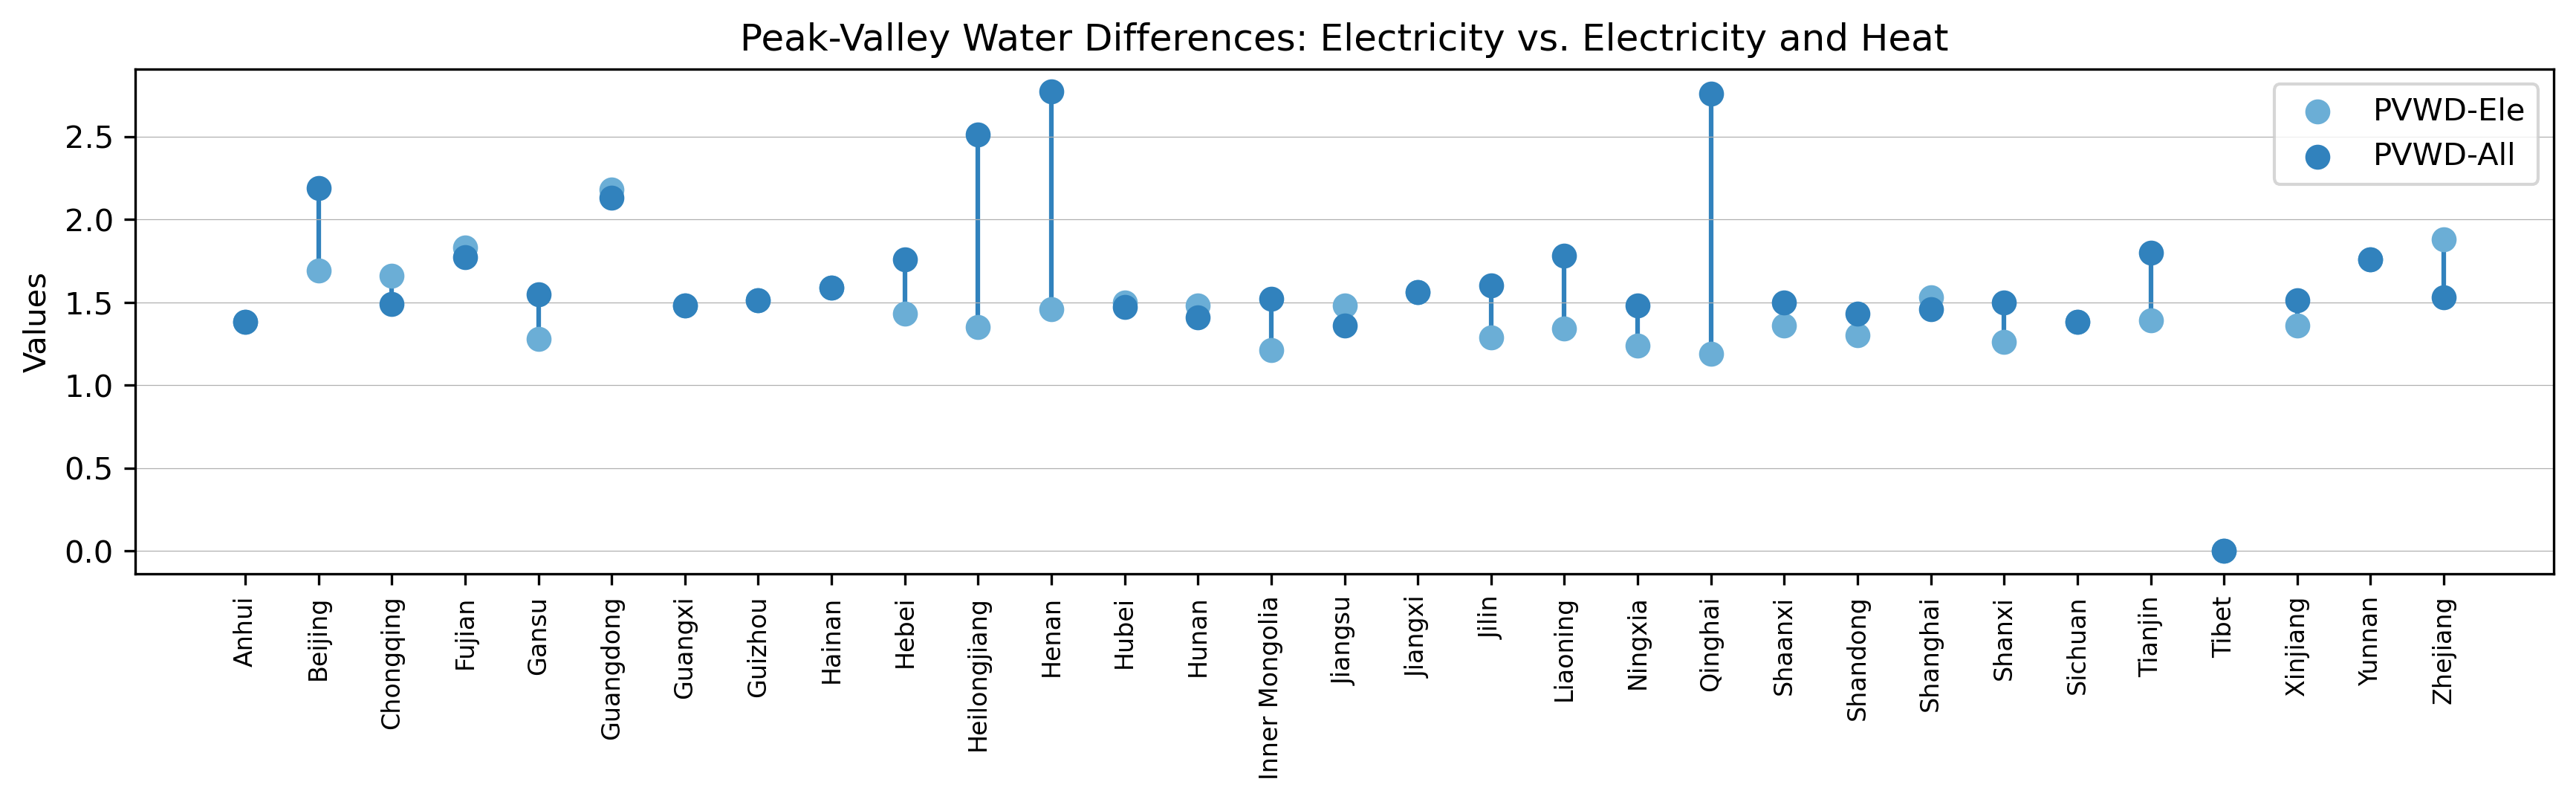

In [13]:
plt.figure(figsize=(14, 3), dpi=300)

# Plot the dumbbell plot
for i, row in df_AD.iterrows():
    plt.plot( [row['Province'], row['Province']],[row['MAD-Ele'], row['MAD-All']], '-', color='#3182bd', markersize=5, zorder=1)
    plt.scatter(row['Province'], row['MAD-Ele'],  color='#6baed6', s=50, label='PVWD-Ele' if i == 0 else "", zorder=2)
    plt.scatter(row['Province'], row['MAD-All'], color='#3182bd', s=50, label='PVWD-All' if i == 0 else "", zorder=2)
    

# plt.gca().invert_yaxis()
# Add labels and title
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Values')
plt.title('Peak-Valley Water Differences: Electricity vs. Electricity and Heat')
plt.legend() #loc='upper left'
plt.grid(which='major', axis='y', linewidth=0.3)
# plt.tick_params(axis='both', which='both', length=0)
# plt.savefig(r"C:/Users/Lenovo/Pictures/symbiosis/PVSD.png", dpi=300, bbox_inches='tight')
plt.show()

In [12]:
df_AD

,Province,MAD-Ele,MAD-All
0,Anhui,1.38,1.38
1,Beijing,1.69,2.19
2,Chongqing,1.66,1.49
3,Fujian,1.83,1.77
4,Gansu,1.28,1.55
5,Guangdong,2.18,2.13
6,Guangxi,1.48,1.48
7,Guizhou,1.51,1.51
8,Hainan,1.59,1.59
9,Hebei,1.43,1.76


### 比较月再生水量,可利用再生水量上限 (分省比较,3种发电技术)

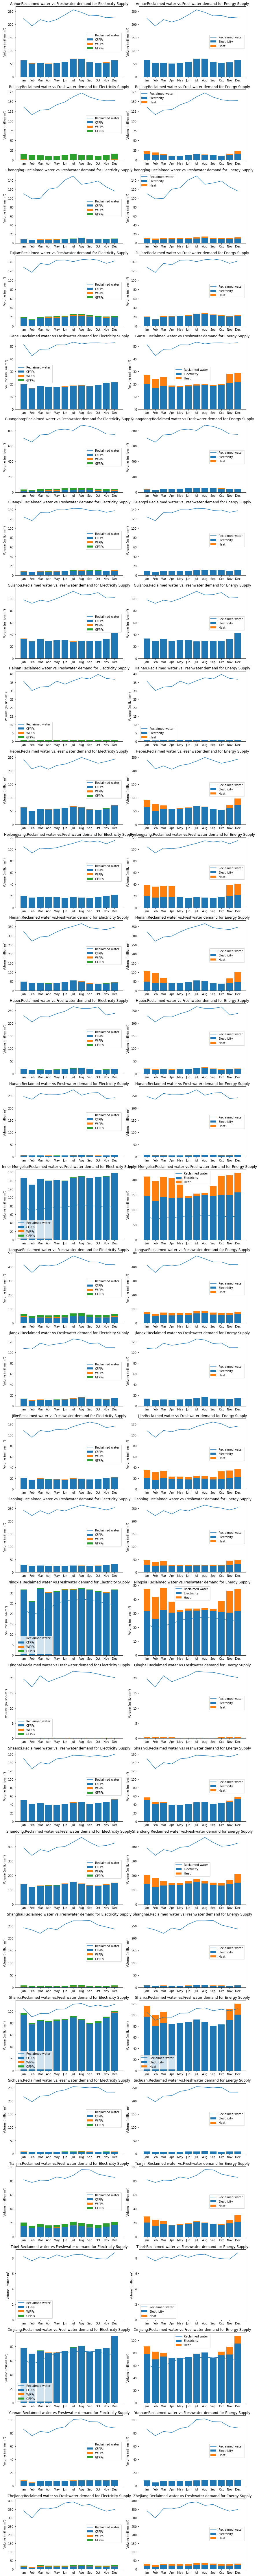

In [9]:
# 第1列：表示在仅考虑电力供应时，不同发电技术需求量VS再生水可供量
# 第2列：表示考虑电力、热力供应时，不同能源的需水量VS再生水可供量
# 获取省份列表
province_list = df_ReWater_Mon['Province'].unique()

# 创建子图布局
num_rows = len(province_list)
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows), squeeze=False)

# # 隐藏最后两个子图
# axs[num_rows-1, num_cols-1].axis('off')
# axs[num_rows-1, num_cols-2].axis('off')

# 遍历省份列表
for i, province in enumerate(province_list):
    # 获取当前省份数据
    province_data = df_ReWater_Mon[df_ReWater_Mon['Province'] == province]
    
    # 获取当前子图对象
#     ax = axs[i // num_cols, i % num_cols]
    
    # 在第1列子图对象上绘制相关数据
    ax1 = axs[i,0]
    ax1.bar(province_data['Month'], province_data['Monthly_Water_Coal_Ele'], label='CFPPs')
    ax1.bar(province_data['Month'], province_data['Monthly_Water_Waste_Ele'], bottom=province_data['Monthly_Water_Coal_Ele'],  label='WIPPs')
    ax1.bar(province_data['Month'], province_data['Monthly_Water_Gas_Ele'], 
            bottom=province_data['Monthly_Water_Coal_Ele']+province_data['Monthly_Water_Waste_Ele'], 
            label='GFPPs')
    ax1.plot(province_data['Month'], province_data['Reclaimed_water_supply'], label='Reclaimed water ')
    
    ax1.set_title(f"{province}:Reclaimed water vs.Freshwater demand for Electricity Supply")
    ax1.set_xticks(province_data['Month'].values)
#     ax1.set_xticklabels(['{:.0f}'.format(label) for label in province_data['Month'].values], rotation=45)
    ax1.set_ylabel('Volume (million m$^3$)')
    ax1.legend()
    
    # 在第2列子图对象上绘制相关数据
    ax2 = axs[i,1]
    ax2.bar(province_data['Month'], province_data['Ele_all'], label='Electricity')
    ax2.bar(province_data['Month'], province_data['Heat_all'], bottom=province_data['Ele_all'],  label='Heat')
    ax2.plot(province_data['Month'], province_data['Reclaimed_water_supply'], label='Reclaimed water ')
    ax2.set_title(f"{province}:Reclaimed water vs.Freshwater demand for Energy Supply")
    ax2.set_xticks(province_data['Month'].values)
#     ax2.set_xticklabels(['{:.0f}'.format(label) for label in province_data['Month'].values], rotation=45)
    ax2.set_ylabel('Volume (million m$^3$)')
    ax2.legend()    
# 调整子图布局和间距
fig.tight_layout()

# 显示图表
plt.show()

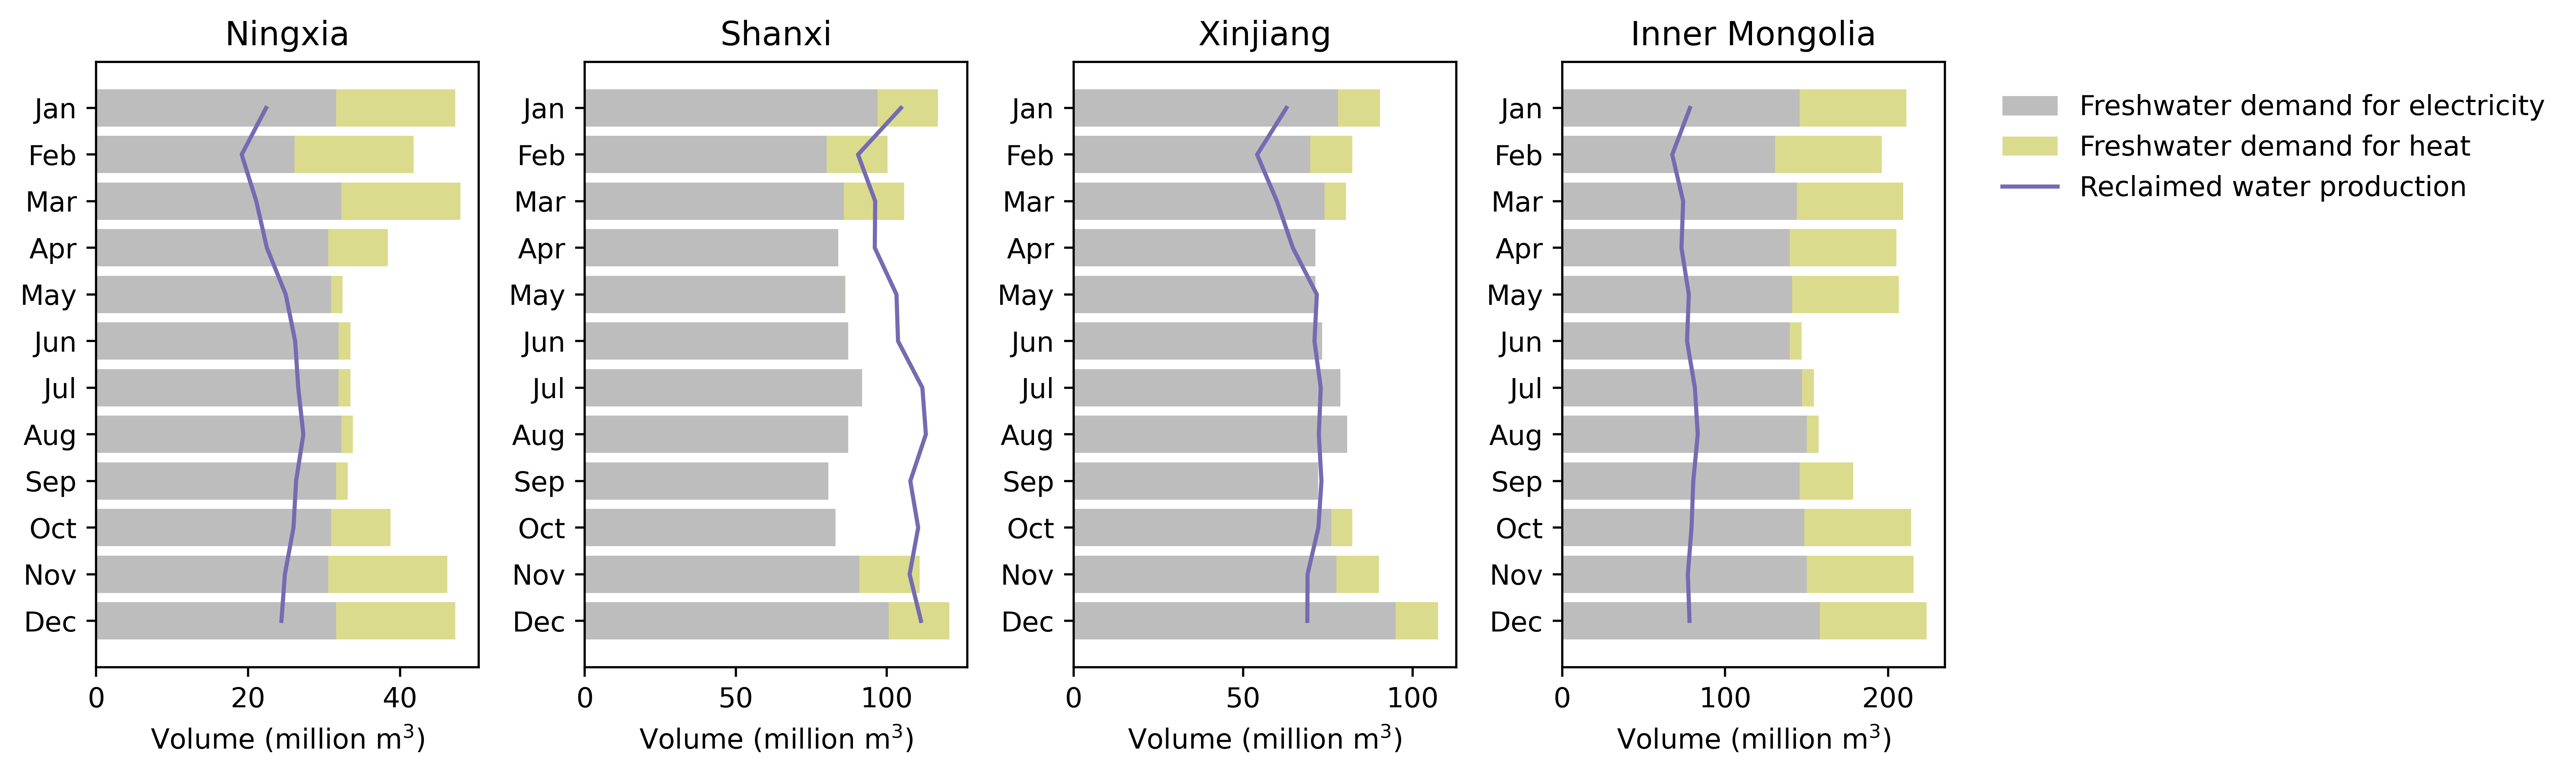

In [13]:
province_list = {'Inner Mongolia', 'Ningxia', 'Shanxi', 'Xinjiang'}

# 创建子图布局
num_rows = 1
num_cols = len(province_list)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 4*num_rows), squeeze=False,dpi=500)

handles, labels = [], []

# 遍历省份列表
for i, province in enumerate(province_list):
    # 获取当前省份数据
    province_data = df_ReWater_Mon[df_ReWater_Mon['Province'] == province]
    
    ax = axs[0, i]
    # 绘制水平堆积条形图
    bar1 = ax.barh(province_data['Month'], province_data['Ele_all'], label='Freshwater demand for electricity',color = '#bdbdbd') #969696
    bar2 = ax.barh(province_data['Month'], province_data['Heat_all'], left=province_data['Ele_all'], label='Freshwater demand for heat',color = '#dbdb8d')
    line, = ax.plot(province_data['Reclaimed_water_supply'], province_data['Month'], label='Reclaimed water production', color='#756bb1')
    
    ax.invert_yaxis()
    ax.set_title(f"{province}")
    ax.set_yticks(province_data['Month'].values)
    ax.set_xlabel('Volume (million m$^3$)')
    
    # 仅在第一次迭代时收集图例句柄和标签
    if i == 0:
        handles.extend([bar1, bar2, line])
        labels = [h.get_label() for h in handles]

plt.tight_layout()
# 在整个图形右侧显示一个总体图例
legend = fig.legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), frameon=False)
plt.savefig(r"C:\Users\Lenovo\Pictures\symbiosis\water_3.png",dpi=500, bbox_extra_artists=[legend], bbox_inches='tight')


plt.show()


### 堆积图

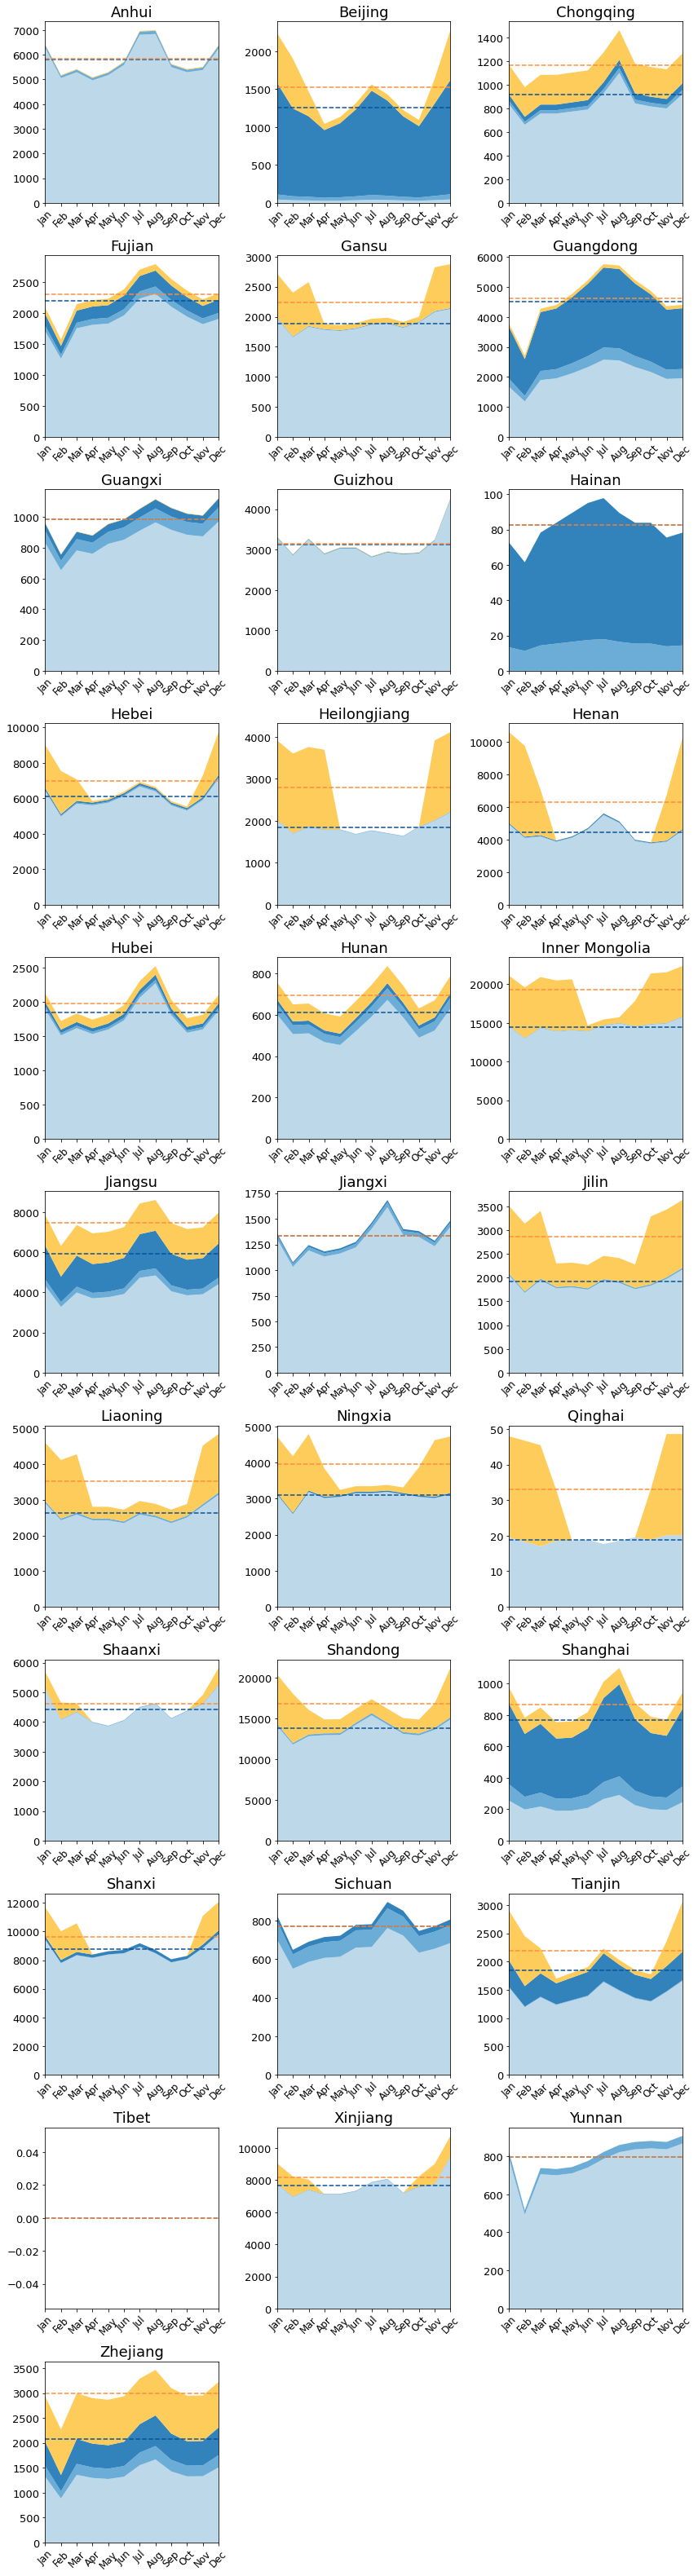

In [16]:
# 获取省份列表
province_list = df_ReWater_Mon['Province'].unique()

# 创建子图布局
num_rows = 11
num_cols = 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows), squeeze=False)

# 隐藏最后两个子图
axs[num_rows-1, num_cols-1].axis('off')
axs[num_rows-1, num_cols-2].axis('off')

# 自定义颜色 (使用RGB值)
colors = [
    (189, 216, 232),   
    (107, 173, 215),   
    (50, 130, 188),   
    (254, 204, 91)    
]

colors = [(r/255, g/255, b/255) for r, g, b in colors]

# 横线颜色
average_ele_color = (9, 80, 152)  # 蓝色系  
average_all_color = (253, 141, 60)  # 红色系 
average_ele_color = tuple(c/255 for c in average_ele_color)
average_all_color = tuple(c/255 for c in average_all_color)

# 遍历省份列表
for i, province in enumerate(province_list):
    # 获取当前省份数据
    province_data = df_ReWater_Mon[df_ReWater_Mon['Province'] == province]
    
    # 获取当前子图对象
    ax = axs[i // num_cols, i % num_cols]
    
    # 在子图对象上绘制相关数据
    ax.stackplot(province_data['Month'],
                 province_data['Monthly_Water_Coal_Ele'], 
                 province_data['Monthly_Water_Waste_Ele'],
                 province_data['Monthly_Water_Gas_Ele'], 
                 province_data['Heat_all'], 
                 labels=['CFPPs-Ele', 'WIPPs-Ele', 'GFPPs-Ele', 'Heat'],
                 colors=colors)
    
    # 计算并添加横线
    average_1 = province_data['Monthly_Water_Ele_ALL'].sum() / 12
    ax.axhline(y=average_1, color=average_ele_color, linestyle='--', label='Average-Ele')
    average_all = province_data['ALL'].sum() / 12
    ax.axhline(y=average_all, color=average_all_color, linestyle='--', label='Average-ALL')
    
    
    ax.set_title(f"{province}", fontsize = 18)
    ax.set_xticks(province_data['Month'].values)
    ax.set_xticklabels(province_data['Month'].values, rotation=45, fontsize = 12)
    ax.set_xlim([province_data['Month'].values[0], province_data['Month'].values[-1]])
#     ax.set_ylabel('Water Consumption (10 thousand m³)', fontsize = 12)
    ax.tick_params(axis='y', labelsize=13) 
#     ax.legend(fontsize = 12)
    
    # 保存当前子图
    fig_single, ax_single = plt.subplots()
    ax_single.stackplot(province_data['Month'],
                        province_data['Monthly_Water_Coal_Ele'], 
                        province_data['Monthly_Water_Waste_Ele'], 
                        province_data['Monthly_Water_Gas_Ele'], 
                        province_data['Heat_all'], 
                        labels=['CFPPs-Ele', 'WIPPs-Ele', 'GFPPs-Ele', 'Heat'],
                        colors=colors)
    ax_single.axhline(y=average_1, color=average_ele_color, linestyle='--', label='Average-Ele')
    ax_single.axhline(y=average_all, color=average_all_color, linestyle='--', label='Average-ALL')

    ax_single.set_title(f"{province}", fontsize = 18)
    ax_single.set_xticks(province_data['Month'].values)
    ax_single.set_xticklabels(province_data['Month'].values, rotation=45, fontsize = 12)
    ax_single.set_xlim([province_data['Month'].values[0], province_data['Month'].values[-1]])
#     ax_single.set_ylabel('Water Consumption (10 thousand m³)', fontsize = 12)
    ax.tick_params(axis='y', labelsize=13) 
#     ax_single.legend(fontsize = 12)
    fig_single.tight_layout()
    fig_single.savefig(f"C:/Users/Lenovo/Pictures/symbiosis/Background/{province}.png", dpi=300)
    plt.close(fig_single)

# 调整子图布局和间距
fig.tight_layout()

plt.show()


In [63]:
df = df_ReWater_Mon[df_ReWater_Mon['Province'] != 'Tibet'].copy()

# Sort the data by Month to ensure the order is Jan-Dec
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df.loc[:,'Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Unit:Million m3
df_grouped = df.groupby(['Month', 'region']).agg({'Monthly_Water_Ele_ALL': 'sum','Heat_all': 'sum'}).div(100).reset_index()

# Pivot the data to have Months as index and Regions as columns
desired_order = ['South grid', 'East grid','Central grid', 'North grid','Northeast grid','Northwest grid' ]
df_pivoted_ele = df_grouped.pivot(index='Month', columns='region', values='Monthly_Water_Ele_ALL')
df_pivoted_heat = df_grouped.pivot(index='Month', columns='region', values='Heat_all')

df_pivoted_ele = df_pivoted_ele[desired_order]
df_pivoted_heat = df_pivoted_heat[desired_order]

In [69]:
df_pivoted_ele

region,South grid,East grid,Central grid,North grid,Northeast grid,Northwest grid
Month,,,,,,
Jan,88.424930,216.386548,107.929689,342.352297,175.930469,180.923311
Feb,68.067778,189.444595,87.934155,279.483068,134.408214,153.716270
Mar,91.526255,208.632502,93.161861,304.155365,160.879452,168.425700
Apr,88.837485,200.337797,88.068083,299.084852,152.107061,160.018547
May,94.925312,201.957926,91.726958,305.127766,154.985075,158.925981
Jun,100.136147,198.130982,100.341513,325.508534,164.310168,164.139218
Jul,104.543910,210.984383,117.123229,353.191133,197.215525,174.668220
Aug,106.182092,211.888241,120.550131,330.610129,202.724897,178.395411
Sep,100.386543,203.975633,97.298771,300.755462,169.315695,163.444879


In [68]:
df_pivoted_heat

region,South grid,East grid,Central grid,North grid,Northeast grid,Northwest grid
Month,,,,,,
Jan,1.253552,115.149229,60.423920,120.166616,26.733801,41.345127
Feb,1.253552,115.149229,60.423920,120.166616,26.733801,41.345127
Mar,1.253552,115.149229,32.514355,70.086762,26.733801,32.313374
Apr,1.253552,92.681700,4.641422,19.607200,26.733801,8.827240
May,1.253552,73.697562,4.641422,19.607200,26.733801,2.384432
Jun,1.253552,15.471536,4.641422,19.607200,26.733801,2.384432
Jul,1.253552,15.471536,4.641422,19.607200,26.733801,2.384432
Aug,1.253552,15.471536,4.641422,19.607200,26.733801,2.384432
Sep,1.253552,40.948888,4.641422,19.607200,26.733801,2.384432


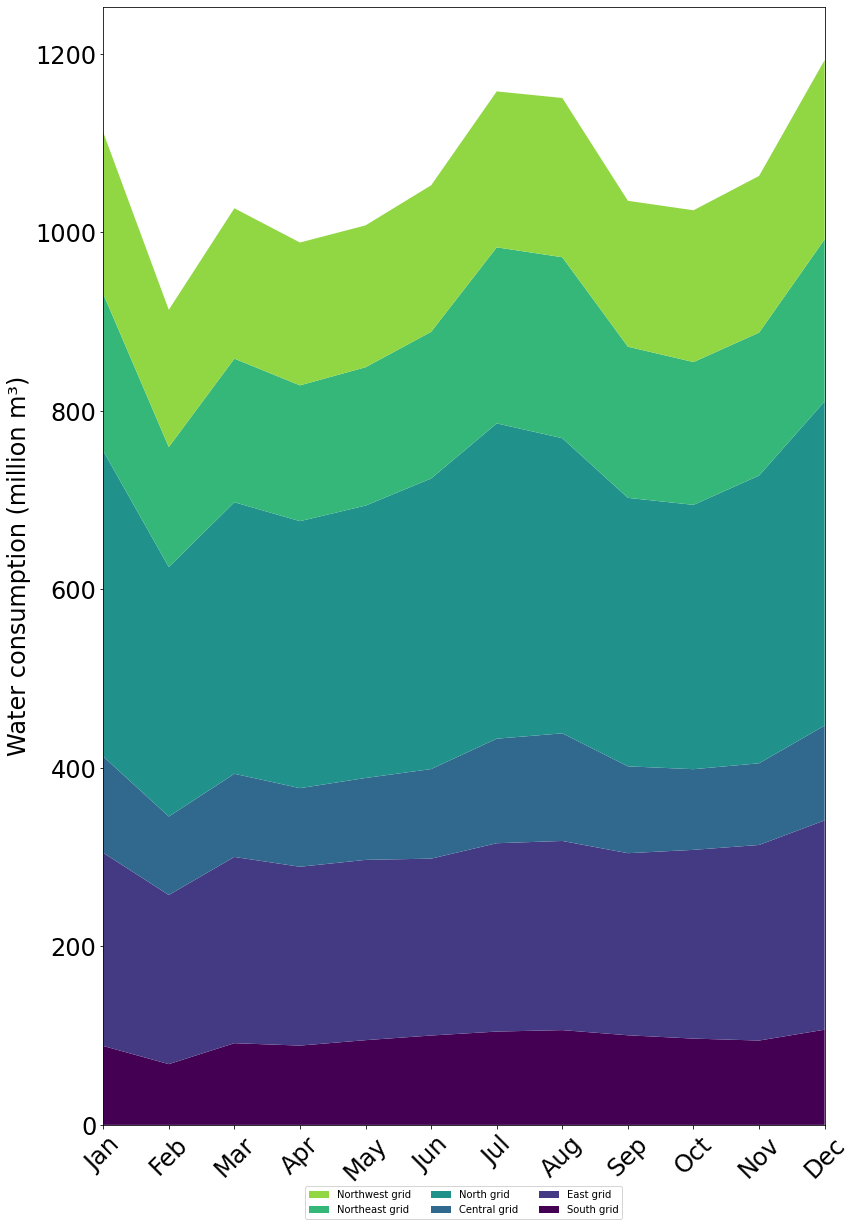

In [114]:
# import matplotlib.cm as cm

num_regions = len(df_pivoted_all.columns)
colors = [cm.viridis(i / num_regions) for i in range(num_regions)]



fig,ax = plt.subplots(figsize=(12, 17))

# Plot ALL values first with solid colors from simple palette
ax.stackplot(df_pivoted_ele.index, df_pivoted_ele.T, labels=[f'{region}' for region in df_pivoted_ele.columns], colors=colors) #[mcolors.to_rgba(c, alpha=0.5) for c in simple_colors[:len(df_pivoted_all.columns)]]
   
    
ax.set_xlim([df_pivoted_ele.index[0], df_pivoted_ele.index[-1]])
ax.set_ylabel('Water consumption (million m³)', fontsize=24)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.xticks(rotation=45, fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()

fig.savefig(f"C:/Users/Lenovo/Pictures/symbiosis/Background/water_consumption_ele_with_legend.png", dpi=300)
plt.show()

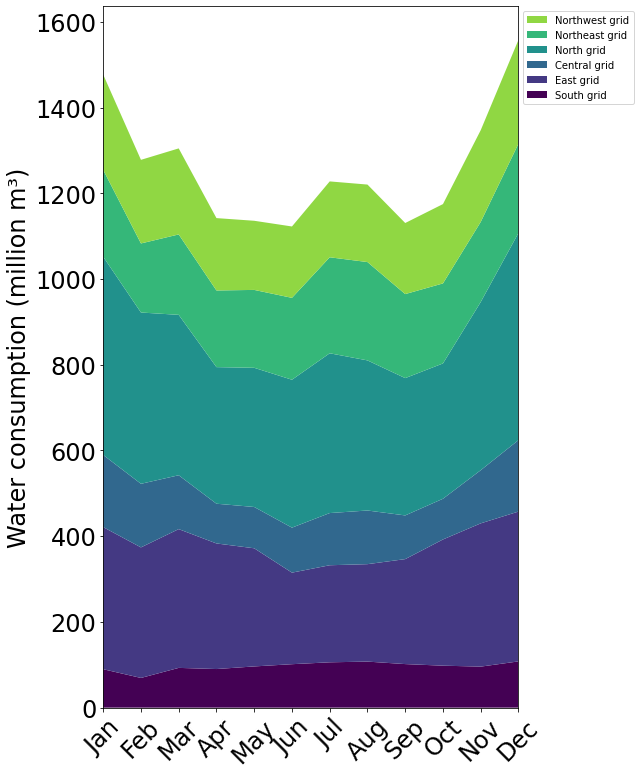

In [105]:
# import matplotlib.cm as cm

num_regions = len(df_pivoted_all.columns)
colors = [cm.viridis(i / num_regions) for i in range(num_regions)]



fig,ax = plt.subplots(figsize=(9, 10.86))

# Plot ALL values first with solid colors from simple palette
ax.stackplot(df_pivoted_all.index, df_pivoted_all.T, labels=[f'{region}' for region in df_pivoted_all.columns], colors=colors) #[mcolors.to_rgba(c, alpha=0.5) for c in simple_colors[:len(df_pivoted_all.columns)]]
   
    
ax.set_xlim([df_pivoted_all.index[0], df_pivoted_all.index[-1]])
ax.set_ylabel('Water consumption (million m³)', fontsize=24)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45, fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()

fig.savefig(f"C:/Users/Lenovo/Pictures/symbiosis/Background/water_consumption_all.png", dpi=300)
plt.show()

In [19]:
# Unit: 1e8 m3
df_water = pd.read_excel('E:/Test/Inputs/WA_2020.xlsx')

df_merged = pd.merge(df_FW_mr, df_water[['Province','WA']],on='Province')

# 创建一个新的DataFrame用于存储结果
df_result = df_merged.copy()

# 遍历每一行，乘以对应的WA值
for index, row in df_merged.iterrows():
    for month in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']:
        df_result.at[index, month] = row[month] * row['WA'] #*10000

df_result = df_result.drop(columns=['WA'])


,Province,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,Anhui,52.952183,44.089635,59.630006,72.976907,93.380432,122.350962,175.933371,177.642036,160.324842,131.155650,106.154381,75.509595
1,Beijing,0.486516,0.358269,0.343931,0.326035,0.334033,0.303293,0.622669,1.782698,1.497278,1.102361,0.815266,0.627651
2,Fujian,19.036515,28.717492,62.502568,95.451890,108.548609,150.503337,82.890611,71.527103,60.712726,30.066533,21.965549,19.077066
3,Gansu,18.273518,12.945215,12.633702,13.117845,19.743911,31.742916,51.246594,62.443209,59.036920,53.359847,37.118846,25.637478
4,Guangdong,44.505965,46.761789,69.240026,111.395192,177.525487,280.395191,247.924996,238.550952,180.235570,104.156787,68.703709,50.604335
5,Guangxi,63.705947,60.736748,85.077589,124.704044,209.126328,342.865289,365.884473,317.627157,223.720590,141.715758,104.130211,71.405865
6,Guizhou,43.012319,40.746326,55.867353,79.971497,120.869786,181.127434,207.261109,194.455305,153.002517,115.567242,82.558266,52.460845
7,Hainan,7.865590,5.527094,4.883850,4.756226,8.331799,15.092911,19.940066,33.334075,58.052343,65.229988,27.211296,12.274764
8,Hebei,5.417148,4.066025,3.983133,3.696139,3.716436,4.030571,13.941341,30.061280,18.649571,12.795963,9.075073,6.967322
9,Henan,15.816135,13.003954,17.274720,21.006636,26.975778,35.055267,50.994120,52.339628,47.520566,39.230027,31.753540,22.629629


In [7]:
folder_path = r'E:/Test/Outputs/FWC_03_S3/'
cfpp_math = pd.read_csv(os.path.join(folder_path,"cfpp_math.csv"))
wipp_math = pd.read_csv(os.path.join(folder_path,"wipp_math.csv"))
gfpp_math = pd.read_csv(os.path.join(folder_path,"gfpp_math.csv"))

In [8]:
cfpp_result = cfpp_math.groupby(['Cap_group','M'])['total'].sum()
wipp_result = wipp_math.groupby(['Cap_group','M'])['total'].sum()
gfpp_result = gfpp_math.groupby(['Cap_group','M'])['total'].sum()
total_result = cfpp_result.add(wipp_result, fill_value=0).add(gfpp_result, fill_value=0)

In [9]:
total_result_df = total_result.reset_index()

# 创建月份的映射
month_mapping = {0: 'Jan', 1: 'Feb', 2: 'Mar', 3: 'Apr', 4: 'May', 5: 'Jun', 6: 'Jul', 7: 'Aug', 8: 'Sep', 9: 'Oct', 10: 'Nov', 11: 'Dec'}

# 将 M 的数值转换为月份名称
total_result_df['M'] = total_result_df['M'].map(month_mapping)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# # 创建按 Cap_group 排列的列表
cap_group_order = ['0-50', '50-100', '100-500', '500-1000', '>1000']

# 使用 pivot_table 将 DataFrame 转换为所需的格式
pivot_result = total_result_df.pivot_table(index='Cap_group', columns='M', values='total', aggfunc='sum').reset_index()
# 将 M 的数值转换为月份名称
pivot_result.columns = [month_mapping[col] if col in month_mapping else col for col in pivot_result.columns]

# # 将 Cap_group 按指定顺序排序
pivot_result = pivot_result.set_index('Cap_group').reindex(cap_group_order).reset_index()

# 按月份顺序排列列
pivot_result = pivot_result[['Cap_group'] + month_order]

# 将所有值转换为其绝对值
pivot_result[month_order] = pivot_result[month_order].abs()

pivot_result.to_csv(os.path.join(folder_path,"All_tech_by_cap.csv"),index = False)

TypeError: 'value' must be an instance of str or bytes, not a float

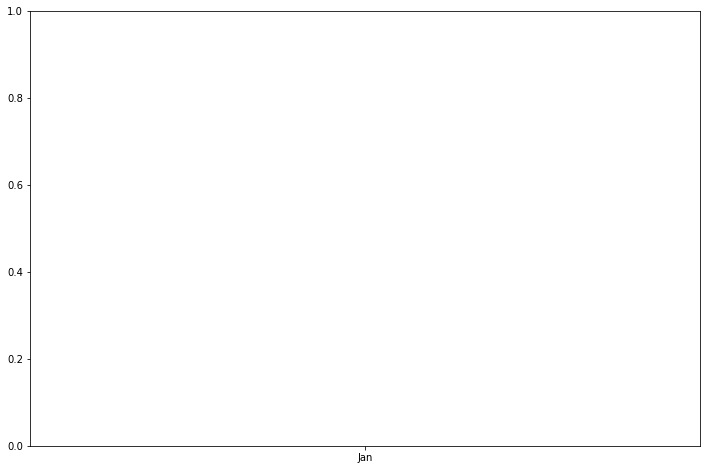

In [47]:
cap_groups = pivot_result.index
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# 绘制堆积面积图
fig, ax = plt.subplots(figsize=(12, 8))

ax.stackplot(months, pivot_result, labels=cap_groups)

# 添加标签和标题
ax.set_xlabel('Month')
ax.set_ylabel('Total')
ax.set_title('Total by Cap_group and Month')
ax.legend(title='Cap_group', bbox_to_anchor=(1.05, 1), loc='upper left')

# 调整 x 轴标签
ax.set_xticks(range(len(months)))
ax.set_xticklabels(months)

# 显示图表
plt.tight_layout()
plt.show()

In [18]:
df_result = pd.read_excel(r"E:\Test\Inputs\WA_2020_monthly.xlsx")
bins = [0, 0.1, 0.2, 0.4, 0.8, 7.0]
labels = ['Low', 'Low-to-mediun', 'Mediun-to-high', 'High', 'Extremely high']

# 根据WTA的范围将数据分组
df_result['WTA_Level'] = pd.cut(df_result['WTA'], bins=bins, labels=labels, include_lowest=True)

# 对每个分组内的Jan-Dec列求和
wta_result = df_result.groupby('WTA_Level')[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].sum()
wta_result

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
WTA_Level,,,,,,,,,,,,
Low,358.435818,272.623789,303.791985,423.018717,773.932604,1367.732533,2147.764414,2292.233902,1966.942691,1471.706167,838.193099,509.724273
Low-to-mediun,337.831698,324.256738,473.791184,625.387422,809.591212,1152.189979,1276.733025,1162.301974,991.319811,768.089371,596.263611,412.343978
Mediun-to-high,279.444359,241.549966,319.558246,442.688721,608.853721,812.168827,914.351858,1154.124839,983.462166,698.704729,494.960564,361.532003
High,74.330019,61.913484,122.531536,149.659256,133.803624,132.134178,194.406064,212.179955,174.611075,137.036217,111.326587,91.068005
Extremely high,35.500506,29.504897,36.353876,38.643625,44.445145,56.268348,100.501674,117.969117,96.715274,75.212725,59.364038,45.120776


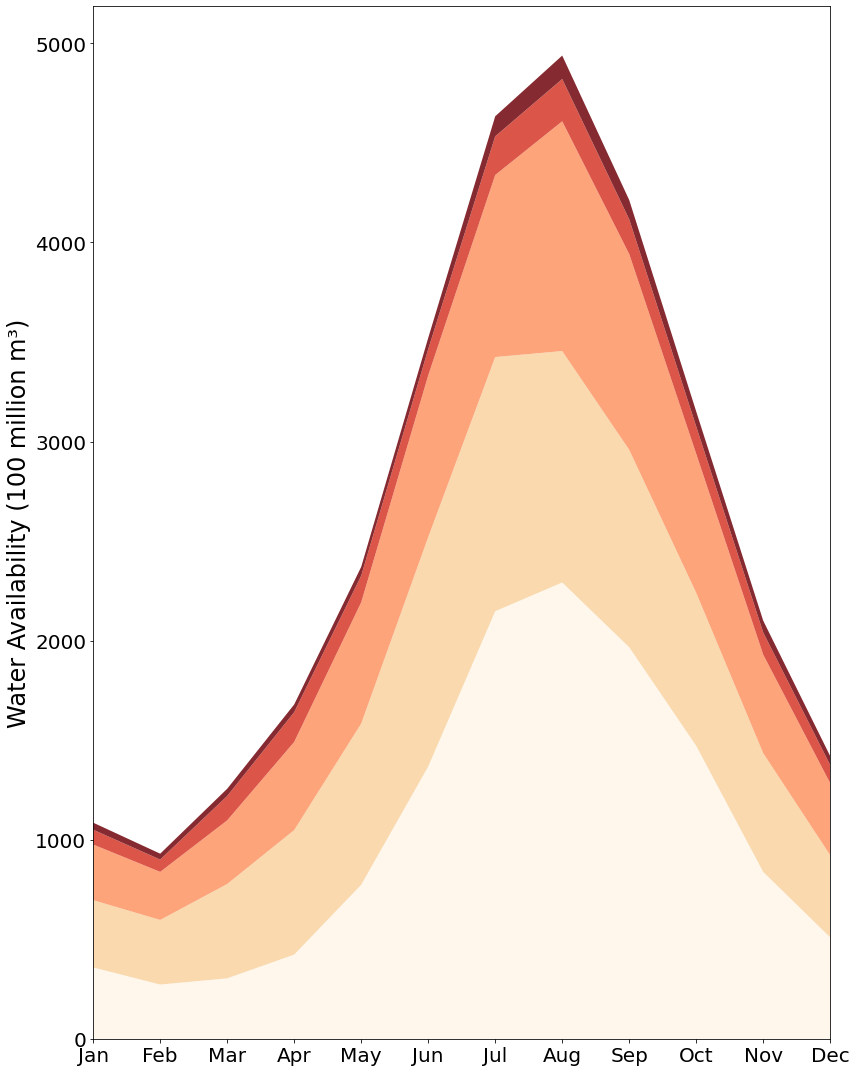

In [26]:
# 自定义的5个RGB颜色值
custom_colors = [
    (255, 247, 236),  # RGB颜色1
    (249, 217, 173),  # RGB颜色2
    (253, 164, 122),  # RGB颜色3
    (219, 85, 72),  # RGB颜色4
    (134, 42, 49)   # RGB颜色5
]

custom_colors = [(r/255, g/255, b/255) for r, g, b in custom_colors]


months = wta_result.columns
values = wta_result.values

# 绘制面积堆积图
fig, ax = plt.subplots(figsize=(12, 15))

ax.stackplot(months, values, labels=labels, colors=custom_colors)

plt.ylabel('Water Availability (100 million m³)', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(months[0], months[-1])
# plt.legend(title='WTA Level', fontsize=14)

plt.tight_layout()
plt.savefig('C:/Users/Lenovo/Pictures/symbiosis/Monthly_Water_Availability_stacked.png', dpi=300)
plt.show()

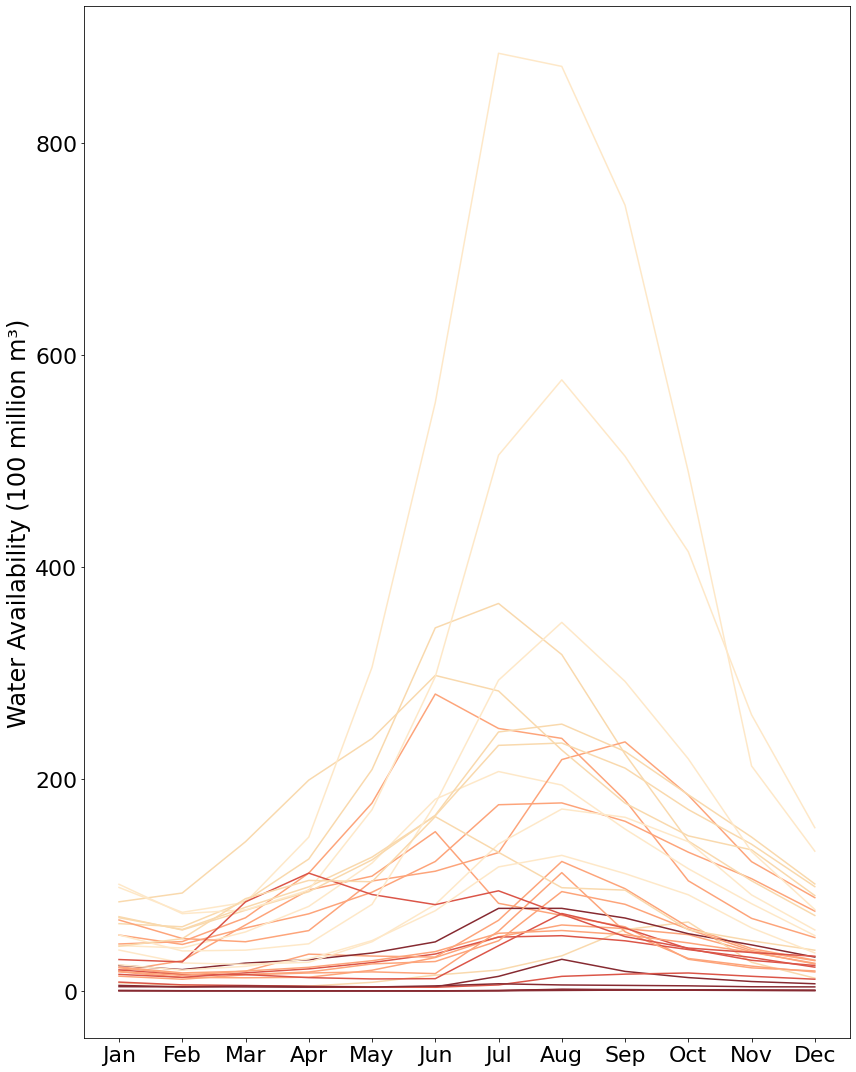

In [18]:
df_result = pd.read_excel(r"E:\Test\Inputs\WA_2020_monthly.xlsx")


# 自定义的5个RGB颜色值
custom_colors = [
    (254, 232, 200),  # RGB颜色1
    (249, 217, 173),  # RGB颜色2
    (253, 164, 122),  # RGB颜色3
    (219, 85, 72),  # RGB颜色4
    (134, 42, 49)   # RGB颜色5
]

custom_colors = [(r/255, g/255, b/255) for r, g, b in custom_colors]


# 自定义的WTA分段范围
bins = [0, 0.1, 0.2, 0.4, 0.8, 7.0]

# 根据自定义分段范围确定颜色
colors = pd.cut(df_result['WTA'], bins=bins, labels=custom_colors, include_lowest=True)

# 绘制折线图
months = df_result.columns[1:-1]  # 获取月份列

plt.figure(figsize=(12, 15))


for i, row in df_result.iterrows():
    province_color = colors[i]
    plt.plot(months, row[1:-1], label=row['Province'], color=province_color) 
    
    

plt.ylabel('Water Availability (100 million m³)', fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.tight_layout()
plt.savefig('C:/Users/Lenovo/Pictures/symbiosis/Monthly_Water_Availability_short.png', dpi=300)
plt.show()

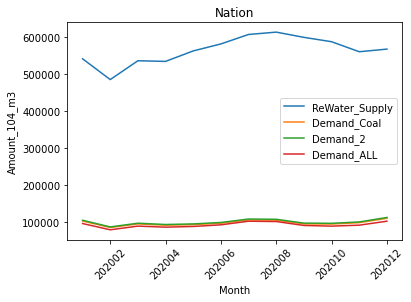

In [10]:
# 总量比较:月再生水量vs仅煤电厂-污水厂协同 

# 计算所有省份的求和值
sum_ReWater = df_ReWater_Mon.groupby('Statistical month')['月处理水量（万m³）'].sum()
sum_ReWater_Coal = df_ReWater_Mon.groupby('Statistical month')['Monthly_Water_Coal'].sum()
sum_ReWater_2 = df_ReWater_Mon.groupby('Statistical month')['Monthly_Water_2'].sum()
sum_ReWater_ALL = df_ReWater_Mon.groupby('Statistical month')['Monthly_Water_ALL'].sum()

# 设置图形大小
fig = plt.figure(figsize=(6, 4))

plt.plot(sum_ReWater.index, sum_ReWater.values, label='ReWater_Supply')
plt.plot(sum_ReWater_Coal.index, sum_ReWater_Coal.values, label='Demand_Coal')
plt.plot(sum_ReWater_2.index, sum_ReWater_2.values, label='Demand_2')
plt.plot(sum_ReWater_ALL.index, sum_ReWater_ALL.values, label='Demand_ALL')
plt.xticks(rotation=45)  
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}"))
plt.xlabel('Month')
plt.ylabel('Amount_104_m3')
plt.title('Nation')
plt.legend()


plt.show()